# Regularized Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss 
from sklearn.metrics import accuracy_score 

In [2]:
data = pd.read_table('ex2data2.txt', sep=',', header=None, names=['microchip_test1', 'microchip_test2', 'accepted'], dtype=np.float32)
data = shuffle(data).reset_index(drop=True)
data

,microchip_test1,microchip_test2,accepted
0,0.63882,-0.24342,1.0
1,-0.06394,-0.18494,1.0
2,0.85196,-0.36769,0.0
3,-0.59965,-0.41886,0.0
4,-0.83007,0.31213,0.0
...,...,...,...
113,-0.60541,0.59722,1.0
114,-0.66302,-0.21418,0.0
115,0.67339,0.64108,0.0
116,0.10311,0.77997,0.0


In [3]:
X_train = data.loc[:95,['microchip_test1', 'microchip_test2']].values
Y_train = data.loc[:95,['accepted']].values

X_test = data.loc[95:,['microchip_test1', 'microchip_test2']].values
Y_test = data.loc[95:,['accepted']].values

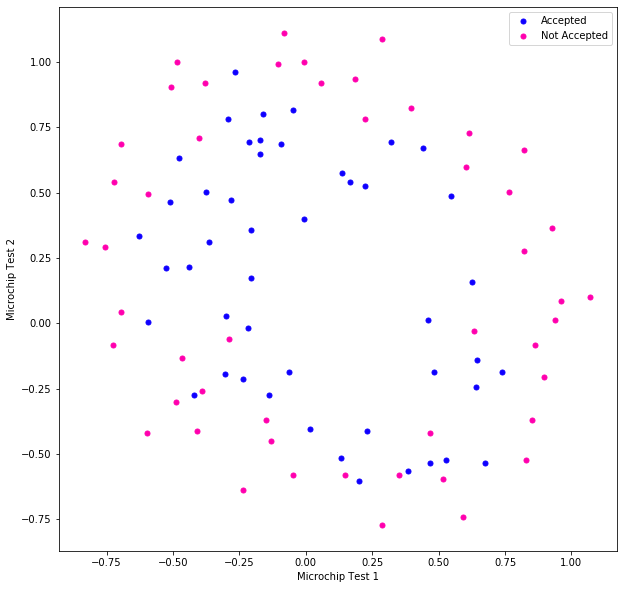

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1])
ax.set_xlabel('Microchip Test 1')
ax.set_ylabel('Microchip Test 2')
pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='', label='Accepted') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='', label='Not Accepted')
ax.legend()

In [5]:
model = Pipeline([('pf', PolynomialFeatures(degree=6, include_bias=False)),
                  ('lr', LogisticRegression(penalty='none', max_iter=10000, solver='sag'))])
                  
model.fit(X_train, Y_train.flatten()) 

Pipeline(memory=None,
         steps=[('pf',
                 PolynomialFeatures(degree=6, include_bias=False,
                                    interaction_only=False, order='C')),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=10000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='none', random_state=None,
                                    solver='sag', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [6]:
Y_pred = model.predict_proba(X_train)
Y_pred

array([[1.31573081e-01, 8.68426919e-01],
       [1.28042758e-01, 8.71957242e-01],
       [8.68127346e-01, 1.31872684e-01],
       [9.99511063e-01, 4.88958147e-04],
       [9.99965250e-01, 3.47503446e-05],
       [4.06795144e-02, 9.59320486e-01],
       [4.38449502e-01, 5.61550498e-01],
       [4.77164865e-01, 5.22835135e-01],
       [2.24468887e-01, 7.75531113e-01],
       [9.98393297e-01, 1.60669850e-03],
       [7.16101706e-01, 2.83898294e-01],
       [3.61155450e-01, 6.38844550e-01],
       [9.99816298e-01, 1.83690674e-04],
       [8.54134560e-04, 9.99145865e-01],
       [1.04224682e-02, 9.89577532e-01],
       [9.84603465e-01, 1.53965242e-02],
       [1.15770102e-03, 9.98842299e-01],
       [9.72584128e-01, 2.74158511e-02],
       [1.44199550e-01, 8.55800450e-01],
       [3.64563525e-01, 6.35436475e-01],
       [9.32732224e-02, 9.06726778e-01],
       [4.16266561e-01, 5.83733439e-01],
       [3.97753716e-03, 9.96022463e-01],
       [9.98767257e-01, 1.23271847e-03],
       [9.552836

In [7]:
log_loss(Y_train, Y_pred)

0.25682481571474813

In [8]:
log_loss(Y_test, model.predict_proba(X_test))

0.6778058612544555

In [9]:
Y_pred_label = model.predict(X_train)
Y_pred_label

array([1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0.], dtype=float32)

In [10]:
Y_train

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],

In [11]:
accuracy_score(Y_train, Y_pred_label)

0.90625

In [12]:
accuracy_score(Y_test, model.predict(X_test))

0.782608695652174

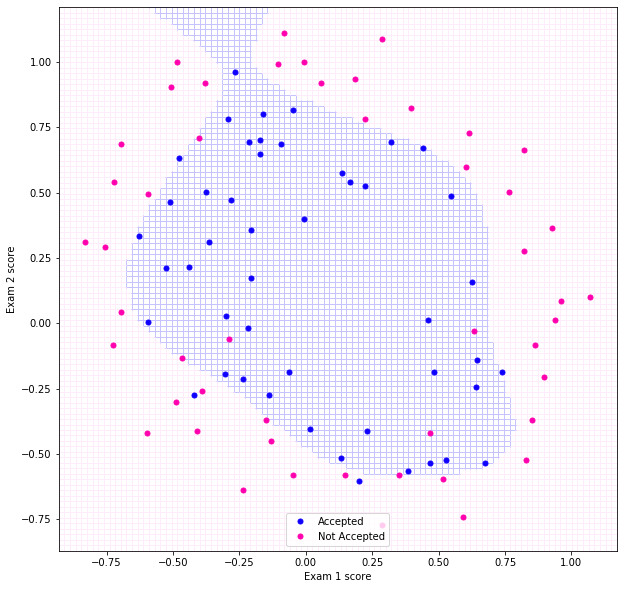

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1])
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
u = np.linspace(np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, 100)
v = np.linspace(np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1, 100)
z = []
for i in range(100):
    for j in range(100):
        z.append([u[i], v[j]])
z = np.array(z)
w = model.predict(z)
model_pos = np.where(w == 1)[0]
model_neg = np.where(w == 0)[0]
ax.plot(z[model_pos,0], z[model_pos,1], marker='+', color='#C7C3FF', markersize=10, linestyle='')
ax.plot(z[model_neg,0], z[model_neg,1], marker='+', color='#FFECFB', markersize=10, linestyle='')
pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='', label='Accepted') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='', label='Not Accepted')
ax.legend()

-----

In [14]:
model = Pipeline([('pf', PolynomialFeatures(degree=6, include_bias=False)),
                  ('lr', LogisticRegression(penalty='l2', C=1/1., max_iter=10000, solver='sag'))])
                  
model.fit(X_train, Y_train.flatten()) 

Pipeline(memory=None,
         steps=[('pf',
                 PolynomialFeatures(degree=6, include_bias=False,
                                    interaction_only=False, order='C')),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=10000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='sag', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [15]:
Y_pred = model.predict_proba(X_train)
Y_pred

array([[0.4418741 , 0.5581259 ],
       [0.30159748, 0.6984025 ],
       [0.7598615 , 0.24013849],
       [0.6944391 , 0.3055609 ],
       [0.75733817, 0.24266183],
       [0.28534418, 0.7146558 ],
       [0.46938735, 0.53061265],
       [0.54108083, 0.45891917],
       [0.48245066, 0.51754934],
       [0.64102817, 0.3589718 ],
       [0.44924527, 0.5507547 ],
       [0.3760972 , 0.6239028 ],
       [0.5968754 , 0.4031246 ],
       [0.23341328, 0.7665867 ],
       [0.30325937, 0.6967406 ],
       [0.6821071 , 0.3178929 ],
       [0.24091452, 0.7590855 ],
       [0.54417616, 0.45582384],
       [0.3848319 , 0.6151681 ],
       [0.46432805, 0.53567195],
       [0.35641712, 0.6435829 ],
       [0.5935354 , 0.40646455],
       [0.2711336 , 0.7288664 ],
       [0.68773115, 0.31226888],
       [0.23897034, 0.76102966],
       [0.63066113, 0.3693389 ],
       [0.22757936, 0.77242064],
       [0.73048246, 0.26951757],
       [0.95980513, 0.0401949 ],
       [0.70373064, 0.29626936],
       [0.

In [16]:
log_loss(Y_train, Y_pred)

0.47685490348764387

In [17]:
log_loss(Y_test, model.predict_proba(X_test))

0.4816284497147021

In [18]:
Y_pred_label = model.predict(X_train)
Y_pred_label

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.], dtype=float32)

In [19]:
Y_train

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],

In [20]:
accuracy_score(Y_train, Y_pred_label)

0.84375

In [21]:
accuracy_score(Y_test, model.predict(X_test))

0.8260869565217391

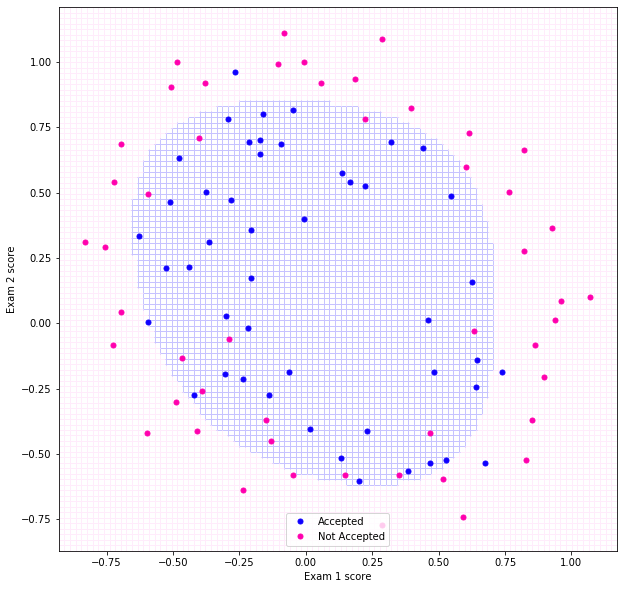

In [22]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1])
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
u = np.linspace(np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, 100)
v = np.linspace(np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1, 100)
z = []
for i in range(100):
    for j in range(100):
        z.append([u[i], v[j]])
z = np.array(z)
w = model.predict(z)
model_pos = np.where(w == 1)[0]
model_neg = np.where(w == 0)[0]
ax.plot(z[model_pos,0], z[model_pos,1], marker='+', color='#C7C3FF', markersize=10, linestyle='')
ax.plot(z[model_neg,0], z[model_neg,1], marker='+', color='#FFECFB', markersize=10, linestyle='')
pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='', label='Accepted') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='', label='Not Accepted')
ax.legend()